In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PASCAL_2007)
df = pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [3]:
dblock = DataBlock(
                   blocks=(ImageBlock,MultiCategoryBlock),
                   splitter=ColSplitter("is_valid"),
                   get_x=lambda r:path/"train"/f'{r["fname"]}',
                   get_y=lambda r: r['labels'].split(' '),
                   item_tfms=Resize(460),
                   batch_tfms=aug_transforms(size=224, min_scale=0.75)
                   )


In [4]:
dls= dblock.dataloaders(df)

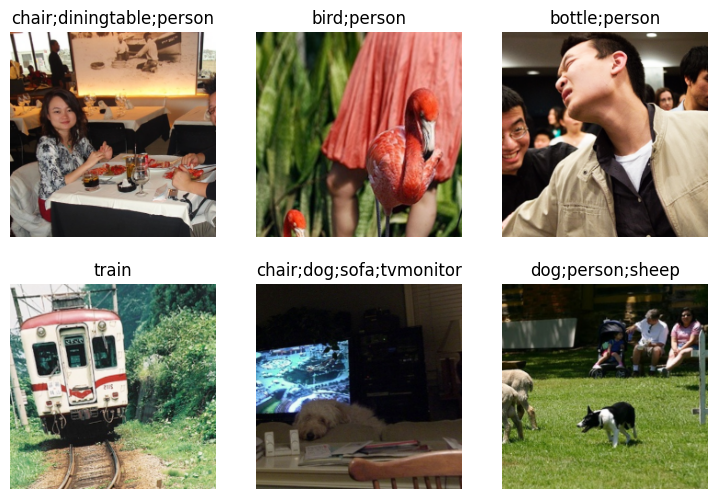

In [5]:
dls.show_batch(nrows=2,ncols=3)

In [7]:
learn = vision_learner(dls,resnet34,metrics=partial(accuracy_multi, thresh=0.5))

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:00<00:00, 131MB/s]


In [8]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.906140,0.585867,0.705617,00:44


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.680061,0.478756,0.805179,00:49
1,0.537992,0.298242,0.934104,00:58
2,0.432067,0.257557,0.949861,00:51


In [10]:
preds,targs= learn.get_preds()
accuracies = np.arange(0.1,1.0,0.05)
acc_results = [accuracy_multi(preds,targs,thresh=t,sigmoid=False)for t in accuracies]

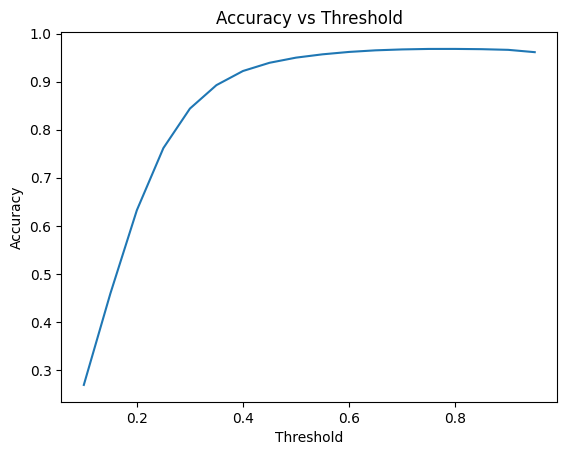

In [11]:
plt.plot(accuracies,acc_results)
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Threshold")
plt.show()

In [12]:
best_thresh = accuracies[np.argmax(acc_results)]
print(f'the best threshold is :{best_thresh}')

the best threshold is :0.8000000000000002


actual labels:['person', 'tvmonitor']


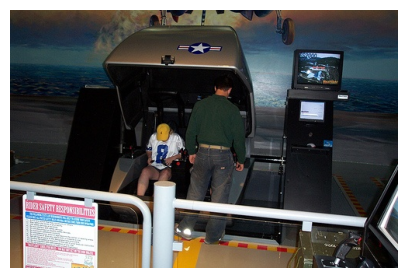

In [13]:
img_idx=10
x,y = dls.valid.dataset[img_idx]
x.show()
print(f"actual labels:{dls.valid.vocab[y.bool()]}")

In [14]:
prediction = learn.predict(dls.valid.dataset[img_idx][0])
print(f"predicted labels:{prediction[0]}")

predicted labels:['bus', 'person', 'tvmonitor']


In [15]:
interp = Interpretation.from_learner(learn)

,target,predicted,probabilities,loss
0,bus,boat;bus;car,"tensor([0.0780, 0.1785, 0.1200, 0.5505, 0.2003, 0.8190, 1.0000, 0.1905, 0.2031,\n 0.1892, 0.0903, 0.1045, 0.1990, 0.1661, 0.0749, 0.2073, 0.1857, 0.1780,\n 0.2794, 0.1561])",0.7163922190666199
1,bicycle,aeroplane;bicycle;bus;motorbike;person;pottedplant,"tensor([0.5214, 0.7706, 0.3600, 0.3282, 0.1793, 0.6874, 0.1705, 0.1286, 0.4764,\n 0.4535, 0.2875, 0.2556, 0.2617, 0.5409, 0.9940, 0.5054, 0.2977, 0.2815,\n 0.2416, 0.4477])",0.693524181842804
2,cat;sofa,bird;sofa,"tensor([0.0177, 0.4726, 0.9998, 0.1524, 0.1088, 0.1473, 0.0103, 0.4090, 0.2142,\n 0.1516, 0.1572, 0.3102, 0.1768, 0.3436, 0.0074, 0.2136, 0.1232, 0.7744,\n 0.0772, 0.4042])",0.6613873243331909
3,bicycle;bus;car;person,motorbike;person;sofa,"tensor([0.0399, 0.3907, 0.2721, 0.1868, 0.1810, 0.1421, 0.0330, 0.2309, 0.1768,\n 0.0926, 0.0705, 0.1399, 0.0754, 0.9588, 0.9794, 0.1831, 0.1570, 0.5284,\n 0.1452, 0.2032])",0.632236659526825
4,bicycle;person,bottle;chair;diningtable;person;pottedplant,"tensor([0.1165, 0.2212, 0.1617, 0.1932, 0.5902, 0.2786, 0.1052, 0.1170, 0.9707,\n 0.3296, 0.8647, 0.1120, 0.1638, 0.2231, 0.7813, 0.5648, 0.3116, 0.3498,\n 0.1225, 0.3335])",0.6187984347343445
5,person;train,bus;car;train,"tensor([0.1587, 0.2704, 0.2365, 0.2166, 0.0772, 0.6165, 0.9881, 0.0977, 0.1237,\n 0.2180, 0.2067, 0.1332, 0.2212, 0.2171, 0.0561, 0.4205, 0.3116, 0.2449,\n 0.9359, 0.3264])",0.6181426048278809
6,person;tvmonitor,bottle;chair;diningtable;person;pottedplant,"tensor([0.1425, 0.1907, 0.2440, 0.2628, 0.8357, 0.1211, 0.0829, 0.0884, 0.7702,\n 0.2194, 0.9826, 0.0810, 0.1253, 0.1999, 0.9920, 0.5582, 0.2505, 0.1444,\n 0.1688, 0.2124])",0.6138442158699036
7,boat;person,boat;chair;diningtable;pottedplant,"tensor([0.1376, 0.1619, 0.1039, 0.5556, 0.3740, 0.1977, 0.1396, 0.0754, 0.9466,\n 0.1391, 0.8992, 0.0967, 0.1609, 0.2751, 0.3079, 0.8233, 0.3555, 0.2450,\n 0.1246, 0.3144])",0.602715253829956
8,chair;dog,chair;diningtable;dog;pottedplant;sofa;tvmonitor,"tensor([0.3178, 0.4286, 0.2362, 0.3241, 0.3456, 0.4589, 0.0818, 0.2601, 0.9899,\n 0.3317, 0.8060, 0.8462, 0.3756, 0.3202, 0.0930, 0.6650, 0.3966, 0.8752,\n 0.3537, 0.7808])",0.59184330701828


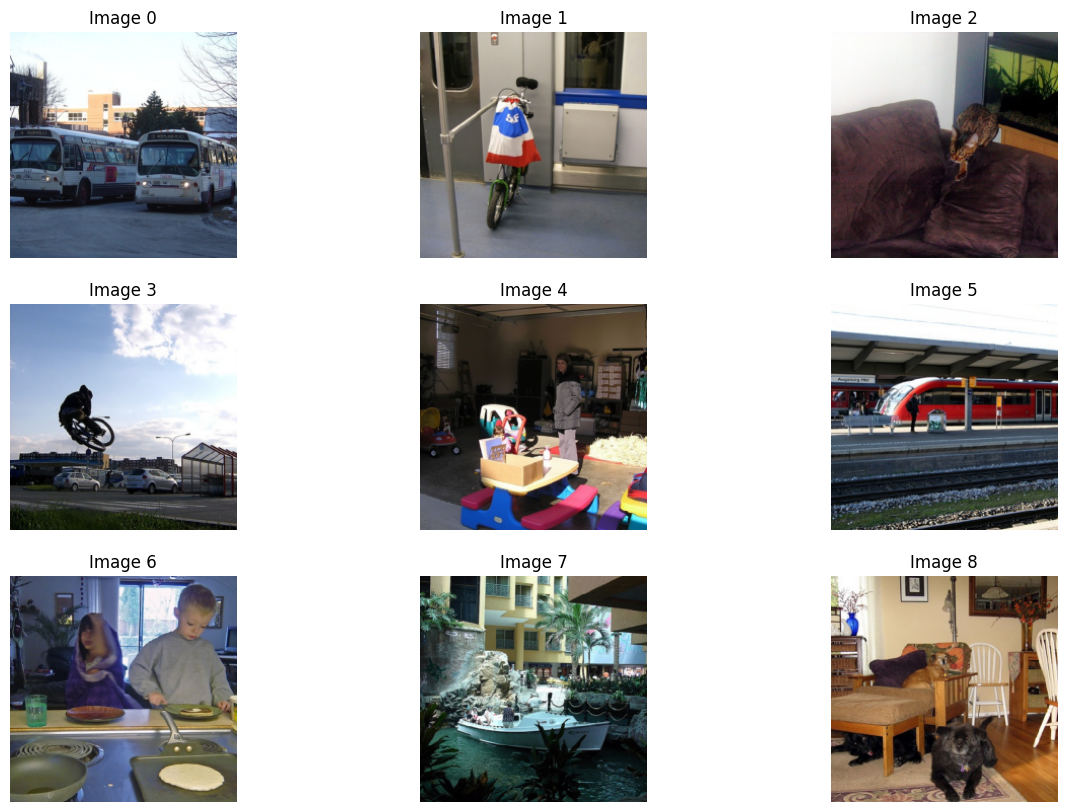

In [16]:
interp.plot_top_losses(9, figsize=(15,10))